In [45]:
from nltk.corpus import wordnet as wn

In [46]:
# nltk.download('wordnet')

Exercice 1

In [47]:
mots = ["cat", "chased", "mouse", "garden"]

In [48]:
for i in mots:
    for j in wn.synsets(i):
        print(j, j.definition())

Synset('cat.n.01') feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
Synset('guy.n.01') an informal term for a youth or man
Synset('cat.n.03') a spiteful woman gossip
Synset('kat.n.01') the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant
Synset('cat-o'-nine-tails.n.01') a whip with nine knotted cords
Synset('caterpillar.n.02') a large tracked vehicle that is propelled by two endless metal belts; frequently used for moving earth in construction and farm work
Synset('big_cat.n.01') any of several large cats typically able to roar and living in the wild
Synset('computerized_tomography.n.01') a method of examining body organs by scanning them with X rays and using a computer to construct a series of cross-sectional scans along a single axis
Synset('cat.v.01') beat with a cat-o'-nine-tails
Synset('vomit.v.01') eject the contents of the stomach through the mouth
Synset('pursue

In [49]:
synsets = ['cat.n.01', 'chase.v.01', 'mouse.n.01', 'garden.n.01']
graph = []
for i in synsets:
    hyponyms = wn.synset(i).hyponyms()
    hypernyms = wn.synset(i).hypernyms()

    meronyms = wn.synset(i).part_meronyms()

    graph.append((i, hyponyms, hypernyms, meronyms))

graph


[('cat.n.01',
  [Synset('domestic_cat.n.01'), Synset('wildcat.n.03')],
  [Synset('feline.n.01')],
  []),
 ('chase.v.01',
  [Synset('quest.v.02'),
   Synset('tree.v.03'),
   Synset('hound.v.01'),
   Synset('run_down.v.07')],
  [Synset('pursue.v.02')],
  []),
 ('mouse.n.01',
  [Synset('house_mouse.n.01'),
   Synset('harvest_mouse.n.02'),
   Synset('wood_mouse.n.01'),
   Synset('field_mouse.n.02'),
   Synset('nude_mouse.n.01')],
  [Synset('rodent.n.01')],
  []),
 ('garden.n.01',
  [Synset('topiary.n.01'),
   Synset('market_garden.n.01'),
   Synset('landscaping.n.02'),
   Synset('formal_garden.n.01'),
   Synset('roof_garden.n.01'),
   Synset('flower_garden.n.01'),
   Synset('pot_farm.n.01'),
   Synset('tea_garden.n.01'),
   Synset('herb_garden.n.01'),
   Synset('grove.n.02'),
   Synset('rock_garden.n.01'),
   Synset('sunken_garden.n.01'),
   Synset('kitchen_garden.n.01'),
   Synset('hop_garden.n.01'),
   Synset('rose_garden.n.01')],
  [Synset('plot.n.02')],
  [])]

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
def afficher_reseau(G, titre="Réseau Sémantique"):
    plt.figure(figsize=(14, 10))
    
    pos = nx.spring_layout(
        G, 
        k=2.5,              
        iterations=100,    
        seed=42,
        scale=2.5          
    )
    
    nx.draw_networkx_nodes(
        G, pos, 
        node_color='lightblue', 
        node_size=3500,    
        alpha=0.9,
        edgecolors='black',
        linewidths=2
    )
    
    nx.draw_networkx_labels(
        G, pos, 
        font_size=11, 
        font_weight='bold'
    )
    
    nx.draw_networkx_edges(
        G, pos, 
        edge_color='gray', 
        arrows=True, 
        arrowsize=20,
        arrowstyle='->', 
        connectionstyle='arc3,rad=0.1',
        width=2,
        min_source_margin=25,
        min_target_margin=25
    )
    
    edge_labels = nx.get_edge_attributes(G, 'relation')
    nx.draw_networkx_edge_labels(
        G, pos, 
        edge_labels=edge_labels, 
        font_color='red',
        font_size=10,
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8)
    )
    
    plt.title(titre, fontsize=16, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout(pad=1.5)
    plt.show()

def propagation_activation(G, start_node, level=3, decay=0.5):
    activation = {start_node: 1.0}
    current = [start_node]
    for i in range(level):
        next_nodes = []
        for node in current:
            for neighbor in G.neighbors(node):
                val = activation[node] * decay
                if neighbor not in activation or val > activation[neighbor]:
                    activation[neighbor] = val
                    next_nodes.append(neighbor)
        current = next_nodes
    return activation

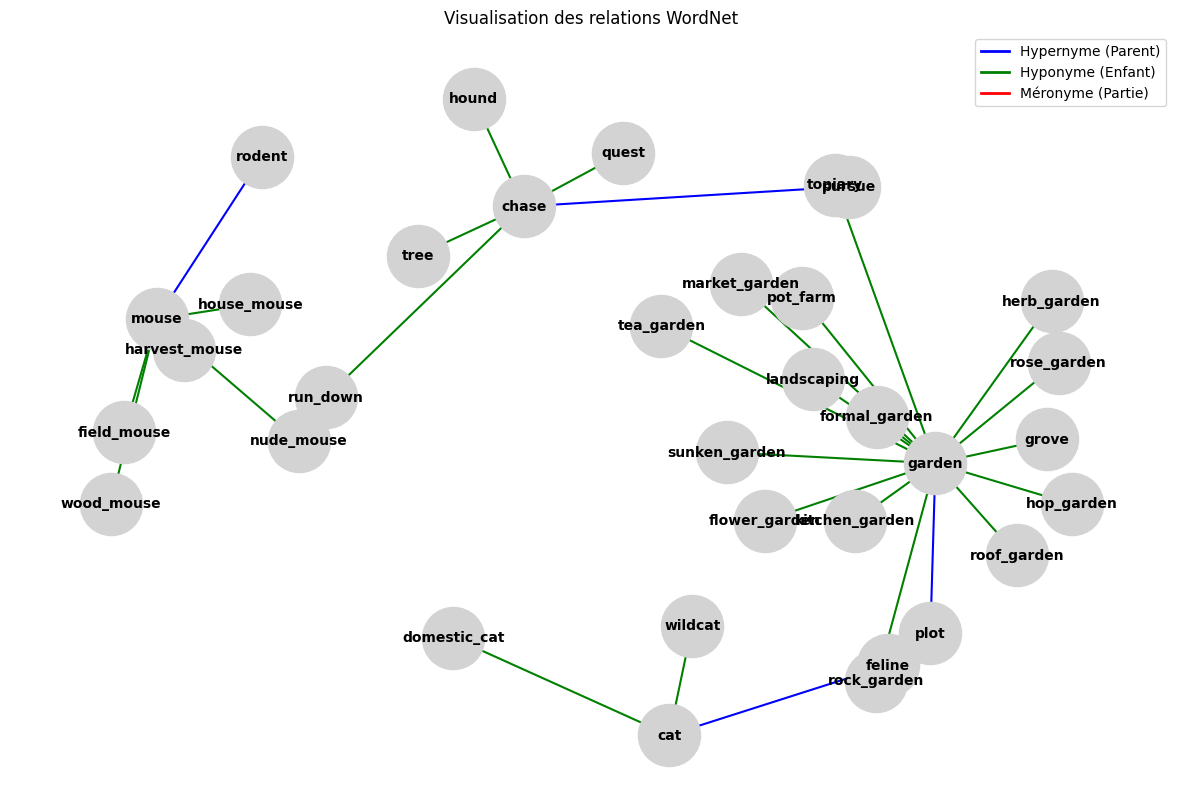

In [51]:
G = nx.DiGraph()
edge_colors = []

for main_node_str, hypos, hypers, meros in graph:
    label_center = main_node_str.split('.')[0]
    
    for h in hypers:
        label_hyper = h.name().split('.')[0]
        G.add_edge(label_center, label_hyper)
        edge_colors.append('blue') 

    for h in hypos:
        label_hypo = h.name().split('.')[0]
        G.add_edge(label_hypo, label_center)
        edge_colors.append('green')
        
    for m in meros:
        label_mero = m.name().split('.')[0]
        G.add_edge(label_center, label_mero)
        edge_colors.append('red')

plt.figure(figsize=(15, 10))

pos = nx.spring_layout(G, k=0.6, iterations=50)

nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightgrey')

nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrowstyle='->', arrowsize=20, width=1.5)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='Hypernyme (Parent)'),
    Line2D([0], [0], color='green', lw=2, label='Hyponyme (Enfant)'),
    Line2D([0], [0], color='red', lw=2, label='Méronyme (Partie)')
]
plt.legend(handles=legend_elements, loc='upper right')
plt.title("Visualisation des relations WordNet")
plt.axis('off')
plt.show()

Exercice 2

In [52]:
mots2 = ["chef", "prepared", "meal", "served", "guests"]

In [53]:
for i in mots2:
    for j in wn.synsets(i):
        print(j, j.definition())

Synset('chef.n.01') a professional cook
Synset('fix.v.12') make ready or suitable or equip in advance for a particular purpose or for some use, event, etc
Synset('cook.v.02') prepare for eating by applying heat
Synset('prepare.v.03') to prepare verbally, either for written or spoken delivery
Synset('organize.v.05') arrange by systematic planning and united effort
Synset('prepare.v.05') educate for a future role or function
Synset('train.v.01') create by training and teaching
Synset('prepare.v.07') lead up to and soften by sounding the dissonant note in it as a consonant note in the preceding chord
Synset('train.v.02') undergo training or instruction in preparation for a particular role, function, or profession
Synset('prepared.a.01') made ready or fit or suitable beforehand
Synset('disposed.s.01') having made preparations
Synset('prepared.s.03') equipped or prepared with necessary intellectual resources
Synset('meal.n.01') the food served and eaten at one time
Synset('meal.n.02') any o

In [54]:
synsets2 = ['chef.n.01', 'prepare.v.02', 'meal.n.01', 'serve.v.05', 'guest.n.01']
graph2 = []

for i in synsets2:
    syn = wn.synset(i)
    hyponyms = syn.hyponyms()
    hypernyms = syn.hypernyms()
    meronyms = syn.part_meronyms()
    
    synonyms = [l.name() for l in syn.lemmas()[:2]]
    
    graph2.append((i, hyponyms, hypernyms, meronyms, synonyms))

graph2

[('chef.n.01',
  [Synset('pastry_cook.n.01'), Synset('cordon_bleu.n.01')],
  [Synset('cook.n.01')],
  [],
  ['chef']),
 ('prepare.v.02',
  [Synset('flambe.v.01'),
   Synset('precook.v.01'),
   Synset('concoct.v.02'),
   Synset('deglaze.v.01'),
   Synset('lard.v.01'),
   Synset('devil.v.02'),
   Synset('whip_up.v.01'),
   Synset('scallop.v.02'),
   Synset('dress.v.06'),
   Synset('put_on.v.03'),
   Synset('preserve.v.04')],
  [Synset('create_from_raw_material.v.01')],
  [],
  ['cook', 'fix']),
 ('meal.n.01',
  [Synset('banquet.n.02'),
   Synset('supper.n.01'),
   Synset('breakfast.n.01'),
   Synset('mess.n.04'),
   Synset('brunch.n.01'),
   Synset('square_meal.n.01'),
   Synset('dinner.n.01'),
   Synset('buffet.n.02'),
   Synset('potluck.n.01'),
   Synset('lunch.n.01'),
   Synset('tea.n.02'),
   Synset('bite.n.04'),
   Synset('nosh-up.n.01'),
   Synset('picnic.n.03'),
   Synset('ploughman's_lunch.n.01'),
   Synset('refection.n.01')],
  [Synset('nutriment.n.01')],
  [Synset('helping.n.01

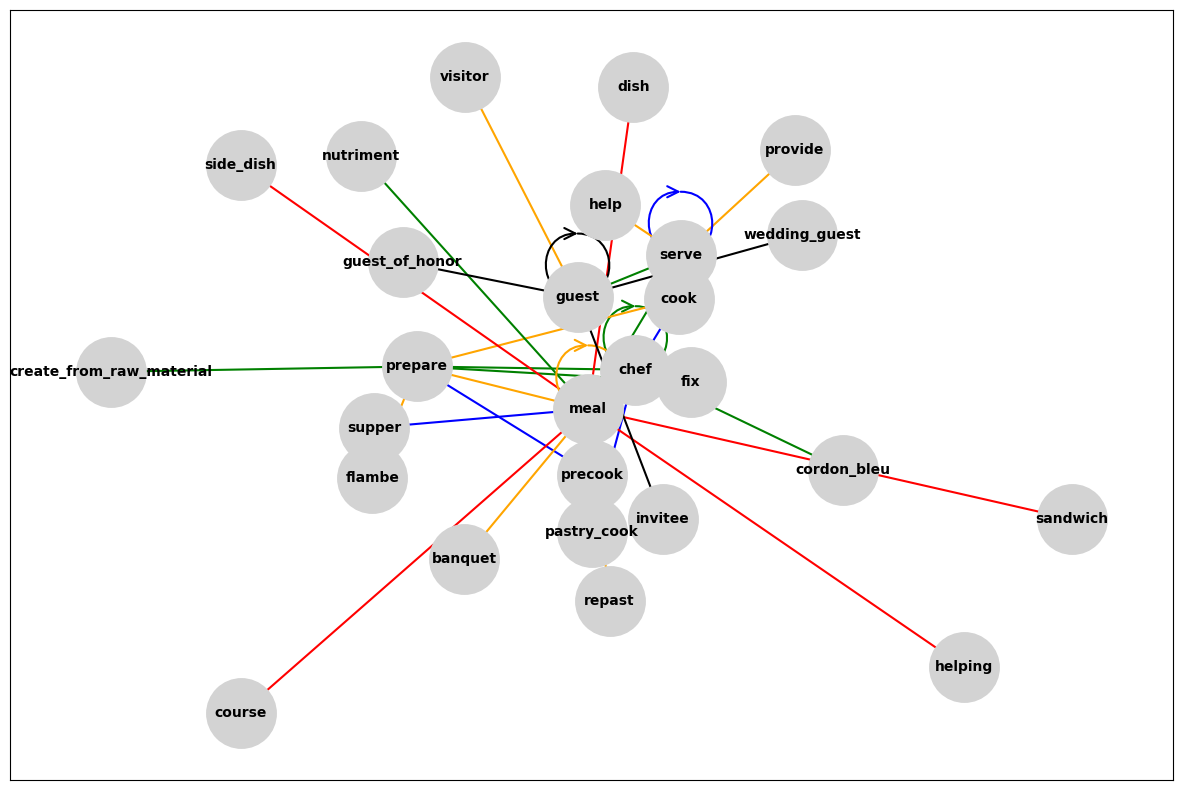

In [63]:
G2 = nx.DiGraph()
edge_colors2 = []

for main_node_str, hypos, hypers, meros, syns in graph2:
    label_center = main_node_str.split('.')[0]
    
    for h in hypers:
        label_hyper = h.name().split('.')[0]
        G2.add_edge(label_center, label_hyper, relation="hypernym")
        edge_colors2.append('blue')

    for h in hypos[:2]:
        label_hypo = h.name().split('.')[0]
        G2.add_edge(label_hypo, label_center, relation="hyponym")
        edge_colors2.append('green')
        
    for m in meros:
        label_mero = m.name().split('.')[0]
        G2.add_edge(label_center, label_mero, relation="meronym")
        edge_colors2.append('red')

    for s in syns:
        G2.add_edge(s, label_center, relation="synonym")
        edge_colors2.append('orange')


G2.add_edge('chef', 'prepare')
edge_colors2.append('black')
G2.add_edge('prepare', 'meal')
edge_colors2.append('black')
G2.add_edge('serve', 'meal')
edge_colors2.append('black')
G2.add_edge('serve', 'guest')
edge_colors2.append('black')

plt.figure(figsize=(15, 10))
pos2 = nx.spring_layout(G2, k=0.6, iterations=50)

nx.draw_networkx_nodes(G2, pos2, node_size=2500, node_color='lightgrey')
nx.draw_networkx_labels(G2, pos2, font_size=10, font_weight="bold")
nx.draw_networkx_edges(G2, pos2, edge_color=edge_colors2, arrowstyle='->', arrowsize=20, width=1.5)

from matplotlib.lines import Line2D

legend_elements2 = [
    Line2D([0], [0], color='blue', lw=2, label='Hypernyme'),
    Line2D([0], [0], color='green', lw=2, label='Hyponyme'),
    Line2D([0], [0], color='red', lw=2, label='Méronyme'),
    Line2D([0], [0], color='orange', lw=2, label='Synonyme'),
    Line2D([0], [0], color='black', lw=2, label='Rôle sémantique')
]

Exercice 3

In [56]:
mots3 = ["buy", "laptop", "store", "write", "report"]

In [57]:
for i in mots3:
    print(f"\nMot: {i.upper()}")
    for j in wn.synsets(i):
        print(j, j.definition())


Mot: BUY
Synset('bargain.n.02') an advantageous purchase
Synset('buy.v.01') obtain by purchase; acquire by means of a financial transaction
Synset('bribe.v.01') make illegal payments to in exchange for favors or influence
Synset('buy.v.03') be worth or be capable of buying
Synset('buy.v.04') acquire by trade or sacrifice or exchange
Synset('buy.v.05') accept as true

Mot: LAPTOP
Synset('laptop.n.01') a portable computer small enough to use in your lap

Mot: STORE
Synset('shop.n.01') a mercantile establishment for the retail sale of goods or services
Synset('store.n.02') a supply of something available for future use
Synset('memory.n.04') an electronic memory device
Synset('storehouse.n.01') a depository for goods
Synset('store.v.01') keep or lay aside for future use
Synset('store.v.02') find a place for and put away for storage

Mot: WRITE
Synset('write.v.01') produce a literary work
Synset('write.v.02') communicate or express by writing
Synset('publish.v.03') have (one's written work

In [58]:
synsets3 = ['buy.v.01', 'laptop.n.01', 'shop.n.01', 'write.v.01', 'report.n.01']

graph3 = []
for i in synsets3:
    syn = wn.synset(i)
    hyponyms = syn.hyponyms()
    hypernyms = syn.hypernyms()
    meronyms = syn.part_meronyms()

    graph3.append((i, hyponyms, hypernyms, meronyms))

graph3

[('buy.v.01',
  [Synset('subscribe.v.05'),
   Synset('take.v.33'),
   Synset('take_out.v.07'),
   Synset('buy_back.v.01'),
   Synset('impulse-buy.v.01'),
   Synset('get.v.22'),
   Synset('take_over.v.05'),
   Synset('pick_up.v.08')],
  [Synset('get.v.01')],
  []),
 ('laptop.n.01', [], [Synset('portable_computer.n.01')], []),
 ('shop.n.01',
  [Synset('outfitter.n.02'),
   Synset('perfumery.n.02'),
   Synset('salon.n.02'),
   Synset('convenience_store.n.01'),
   Synset('head_shop.n.01'),
   Synset('confectionery.n.02'),
   Synset('hardware_store.n.01'),
   Synset('drugstore.n.01'),
   Synset('millinery.n.01'),
   Synset('clothing_store.n.01'),
   Synset('chain_store.n.01'),
   Synset('florist.n.02'),
   Synset('cleaners.n.01'),
   Synset('shoe_shop.n.01'),
   Synset('specialty_store.n.01'),
   Synset('gift_shop.n.01'),
   Synset('toyshop.n.01'),
   Synset('booth.n.04'),
   Synset('canteen.n.02'),
   Synset('pizzeria.n.01'),
   Synset('boutique.n.01'),
   Synset('repair_shop.n.01'),
   Sy

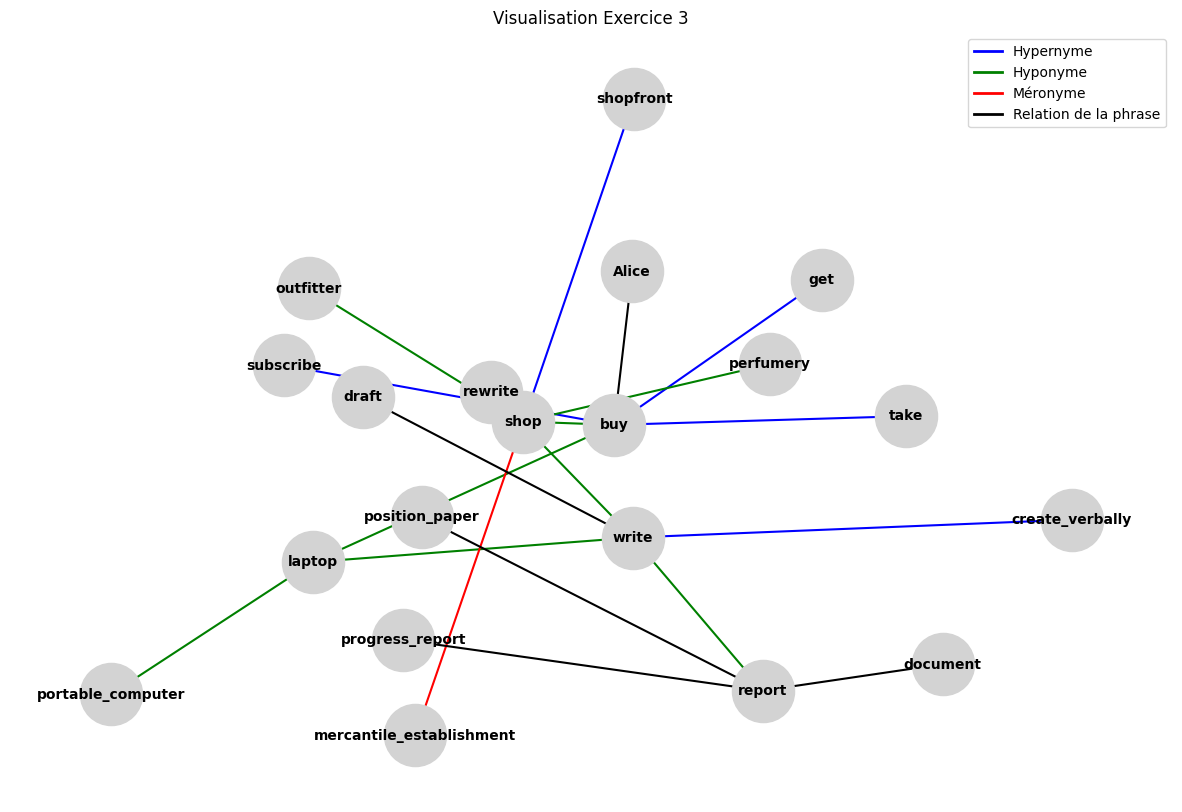

In [59]:
G3 = nx.DiGraph()
edge_colors3 = []

for main_node_str, hypos, hypers, meros in graph3:
    label_center = main_node_str.split('.')[0]
    
    for h in hypers:
        label_hyper = h.name().split('.')[0]
        G3.add_edge(label_center, label_hyper)
        edge_colors3.append('blue') 

    for h in hypos[:2]:
        label_hypo = h.name().split('.')[0]
        G3.add_edge(label_hypo, label_center)
        edge_colors3.append('green')
        
    for m in meros:
        label_mero = m.name().split('.')[0]
        G3.add_edge(label_center, label_mero)
        edge_colors3.append('red')

G3.add_edge('Alice', 'buy')
edge_colors3.append('black')
G3.add_edge('buy', 'laptop')
edge_colors3.append('black')
G3.add_edge('buy', 'shop') 
edge_colors3.append('black')

G3.add_edge('laptop', 'write')
edge_colors3.append('black')
G3.add_edge('write', 'report')
edge_colors3.append('black')

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G3, k=0.6, iterations=50)
nx.draw_networkx_nodes(G3, pos, node_size=2000, node_color='lightgrey')
nx.draw_networkx_labels(G3, pos, font_size=10, font_weight="bold")
nx.draw_networkx_edges(G3, pos, edge_color=edge_colors3, arrowstyle='->', arrowsize=20, width=1.5)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='Hypernyme'),
    Line2D([0], [0], color='green', lw=2, label='Hyponyme'),
    Line2D([0], [0], color='red', lw=2, label='Méronyme'),
    Line2D([0], [0], color='black', lw=2, label='Relation de la phrase')
]
plt.legend(handles=legend_elements, loc='upper right')
plt.title("Visualisation Exercice 3")
plt.axis('off')
plt.show()

Exercice 4

In [60]:
mots4 = ["voiture", "autobus", "vélo", "véhicule", "machine", "moteur", "batterie", "carburant", "passager", "route", "avion", "ciel"]

for i in mots4:
    for j in wn.synsets(i, lang='fra'):
        print(j, j.definition())

Synset('automobile.v.01') travel in an automobile
Synset('cable_car.n.01') a conveyance for passengers or freight on a cable railway
Synset('car.n.01') a motor vehicle with four wheels; usually propelled by an internal combustion engine
Synset('car.n.02') a wheeled vehicle adapted to the rails of railroad
Synset('car.n.04') where passengers ride up and down
Synset('passenger_car.n.01') a railcar where passengers ride
Synset('bus.v.03') remove used dishes from the table in restaurants
Synset('bus.v.02') ride in a bus
Synset('bus.v.01') send or move around by bus
Synset('bus.n.01') a vehicle carrying many passengers; used for public transport
Synset('busbar.n.01') an electrical conductor that makes a common connection between several circuits
Synset('bus_topology.n.01') the topology of a network whose components are connected by a busbar
Synset('coach.n.02') a person who gives private instruction (as in singing, acting, etc.)
Synset('bicycle.n.01') a wheeled vehicle that has two wheels a

In [61]:
synsets4 = ['car.n.01', 'bus.n.01', 'bicycle.n.01', 'vehicle.n.01', 'machine.n.01', 'engine.n.01', 'battery.n.02', 'fuel.n.01', 'passenger.n.01', 'road.n.01', 'airplane.n.01', 'sky.n.01']
graph4 = []

for i in synsets4:
    syn = wn.synset(i)
    hyponyms = syn.hyponyms()
    hypernyms = syn.hypernyms()
    meronyms = syn.part_meronyms()
    graph4.append((i, hyponyms, hypernyms, meronyms))
graph4

[('car.n.01',
  [Synset('model_t.n.01'),
   Synset('cab.n.03'),
   Synset('racer.n.02'),
   Synset('minivan.n.01'),
   Synset('limousine.n.01'),
   Synset('used-car.n.01'),
   Synset('bus.n.04'),
   Synset('sport_utility.n.01'),
   Synset('horseless_carriage.n.01'),
   Synset('ambulance.n.01'),
   Synset('roadster.n.01'),
   Synset('convertible.n.01'),
   Synset('gas_guzzler.n.01'),
   Synset('subcompact.n.01'),
   Synset('touring_car.n.01'),
   Synset('beach_wagon.n.01'),
   Synset('coupe.n.01'),
   Synset('pace_car.n.01'),
   Synset('stanley_steamer.n.01'),
   Synset('jeep.n.01'),
   Synset('electric.n.01'),
   Synset('loaner.n.02'),
   Synset('hot_rod.n.01'),
   Synset('minicar.n.01'),
   Synset('compact.n.03'),
   Synset('cruiser.n.01'),
   Synset('hatchback.n.01'),
   Synset('sedan.n.01'),
   Synset('sports_car.n.01'),
   Synset('hardtop.n.01'),
   Synset('stock_car.n.01')],
  [Synset('motor_vehicle.n.01')],
  [Synset('sunroof.n.01'),
   Synset('automobile_horn.n.01'),
   Synset('

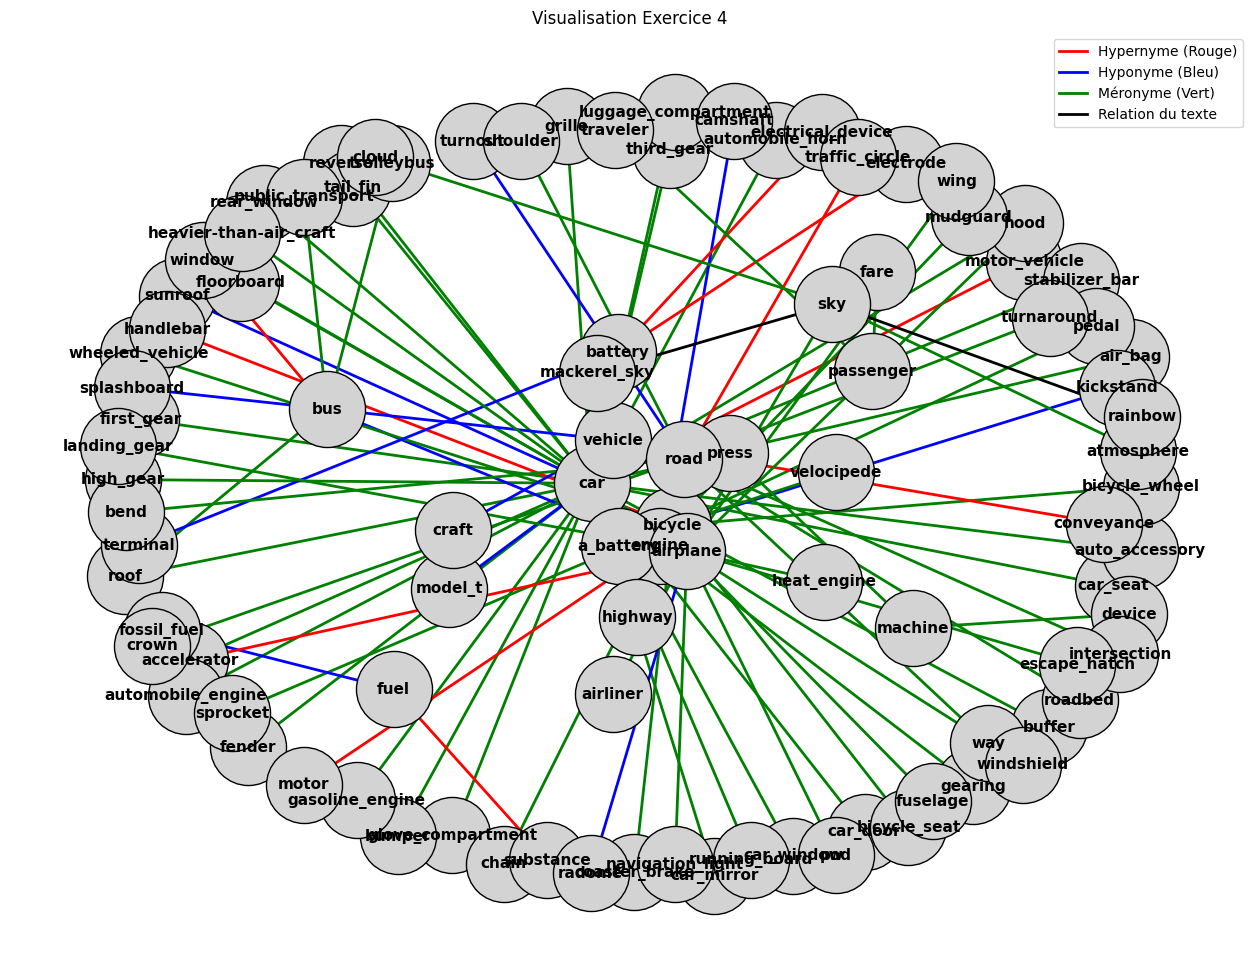

In [62]:
G4 = nx.DiGraph()
edge_colors4 = []

for main_node_str, hypos, hypers, meros in graph4:
    label_center = main_node_str.split('.')[0]
    
    for h in hypers:
        label_hyper = h.name().split('.')[0]
        G4.add_edge(label_center, label_hyper)
        edge_colors4.append('red')

    for h in hypos[:1]: 
        label_hypo = h.name().split('.')[0]
        G4.add_edge(label_hypo, label_center)
        edge_colors4.append('blue')
        
    for m in meros:
        label_mero = m.name().split('.')[0]
        G4.add_edge(label_center, label_mero)
        edge_colors4.append('green')

G4.add_edge('car', 'engine'); edge_colors4.append('green')
G4.add_edge('bus', 'engine'); edge_colors4.append('green')
G4.add_edge('car', 'battery'); edge_colors4.append('green')
G4.add_edge('vehicle', 'road'); edge_colors4.append('black')
G4.add_edge('airplane', 'sky'); edge_colors4.append('black')

plt.figure(figsize=(16, 12))
pos4 = nx.spring_layout(G4, k=0.9, iterations=100, seed=42)

nx.draw_networkx_nodes(G4, pos4, node_size=3000, node_color='lightgrey', edgecolors='black')
nx.draw_networkx_labels(G4, pos4, font_size=11, font_weight="bold")
nx.draw_networkx_edges(G4, pos4, edge_color=edge_colors4, arrowstyle='->', arrowsize=25, width=2)

from matplotlib.lines import Line2D
legend_elements4 = [
    Line2D([0], [0], color='red', lw=2, label='Hypernyme (Rouge)'),
    Line2D([0], [0], color='blue', lw=2, label='Hyponyme (Bleu)'),
    Line2D([0], [0], color='green', lw=2, label='Méronyme (Vert)'),
    Line2D([0], [0], color='black', lw=2, label='Relation du texte')
]
plt.legend(handles=legend_elements4, loc='upper right')
plt.title("Visualisation Exercice 4")
plt.axis('off')
plt.show()